In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
#from fuzzywuzzy import fuzz
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [3]:
with open('title.pkl', 'rb') as f:
    book_title = pickle.load(f)

In [4]:
with open('rating.pkl', 'rb') as f:
    book_rating = pickle.load(f)

In [5]:
with open('number_rating.pkl', 'rb') as f:
    book_number_rating = pickle.load(f)

In [6]:
with open('year_published.pkl', 'rb') as f:
    book_year_published = pickle.load(f)

In [7]:
with open('movie_data.pkl', 'rb') as f:
    movie_data = pickle.load(f)

In [8]:
book_data = pd.DataFrame(
    {'book_title': book_title,
     'book_rating': book_rating,
     'book_number_rating': book_number_rating,
     'book_year_published': book_year_published
    })

In [53]:
with open('book_data.pkl', 'wb') as f:
    pickle.dump(book_data, f)

In [9]:
book_data.dtypes

book_title             object
book_rating            object
book_number_rating     object
book_year_published    object
dtype: object

In [10]:
book_data["book_rating"] = pd.to_numeric(book_data["book_rating"])

In [11]:
book_data.dtypes

book_title              object
book_rating            float64
book_number_rating      object
book_year_published     object
dtype: object

In [57]:
movie_data.dtypes

adult                     object
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [12]:
book_movie = pd.merge(book_data, movie_data,  left_on='book_title', right_on = 'title')

In [13]:
book_movie.shape

(705, 28)

In [14]:
book_movie.dtypes

book_title                object
book_rating              float64
book_number_rating        object
book_year_published       object
adult                     object
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [15]:
book_movie.corr()

,book_rating,budget,revenue,runtime,vote_average,vote_count
book_rating,1.000000,0.119831,0.171653,-0.005385,0.206703,0.202751
budget,0.119831,1.000000,0.753144,0.121404,0.099657,0.603412
revenue,0.171653,0.753144,1.000000,0.113938,0.158091,0.747391
runtime,-0.005385,0.121404,0.113938,1.000000,0.001977,0.109464
vote_average,0.206703,0.099657,0.158091,0.001977,1.000000,0.272046
vote_count,0.202751,0.603412,0.747391,0.109464,0.272046,1.000000


In [26]:
book_movie.sample(5)

,book_title,book_rating,book_number_rating,book_year_published,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
183,Animal Farm,3.91,"2,316,989",1945,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,11848,...,1954-12-29,0.0,72.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He's got the world in an UPROAR!,Animal Farm,False,6.8,83.0
626,The Last Picture Show,3.97,"12,522",1966,False,"{'id': 135509, 'name': 'The Last Picture Show ...",1300000,"[{'id': 18, 'name': 'Drama'}]",http://www.filmsite.org/lastp.html,25188,...,1971-10-03,29133000.0,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Anarene, Texas, 1951. Nothing much has changed...",The Last Picture Show,False,7.6,133.0
514,Trainspotting,4.09,"125,329",1993,False,"{'id': 424202, 'name': 'Trainspotting Collecti...",4000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",http://www.miramax.com/movie/trainspotting/,627,...,1996-02-23,16491080.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Choose life.,Trainspotting,False,7.8,2737.0
179,Revolutionary Road,3.90,"71,511",1961,False,NaN,35000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,4148,...,2008-12-19,75225693.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,How do you break free without breaking apart?,Revolutionary Road,False,6.8,824.0
659,My Friend Flicka,4.15,"27,009",1941,False,"{'id': 100992, 'name': 'The Flicka Collection'...",0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,18992,...,1943-05-26,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A story from the heart of America...to thrill ...,My Friend Flicka,False,3.8,2.0


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


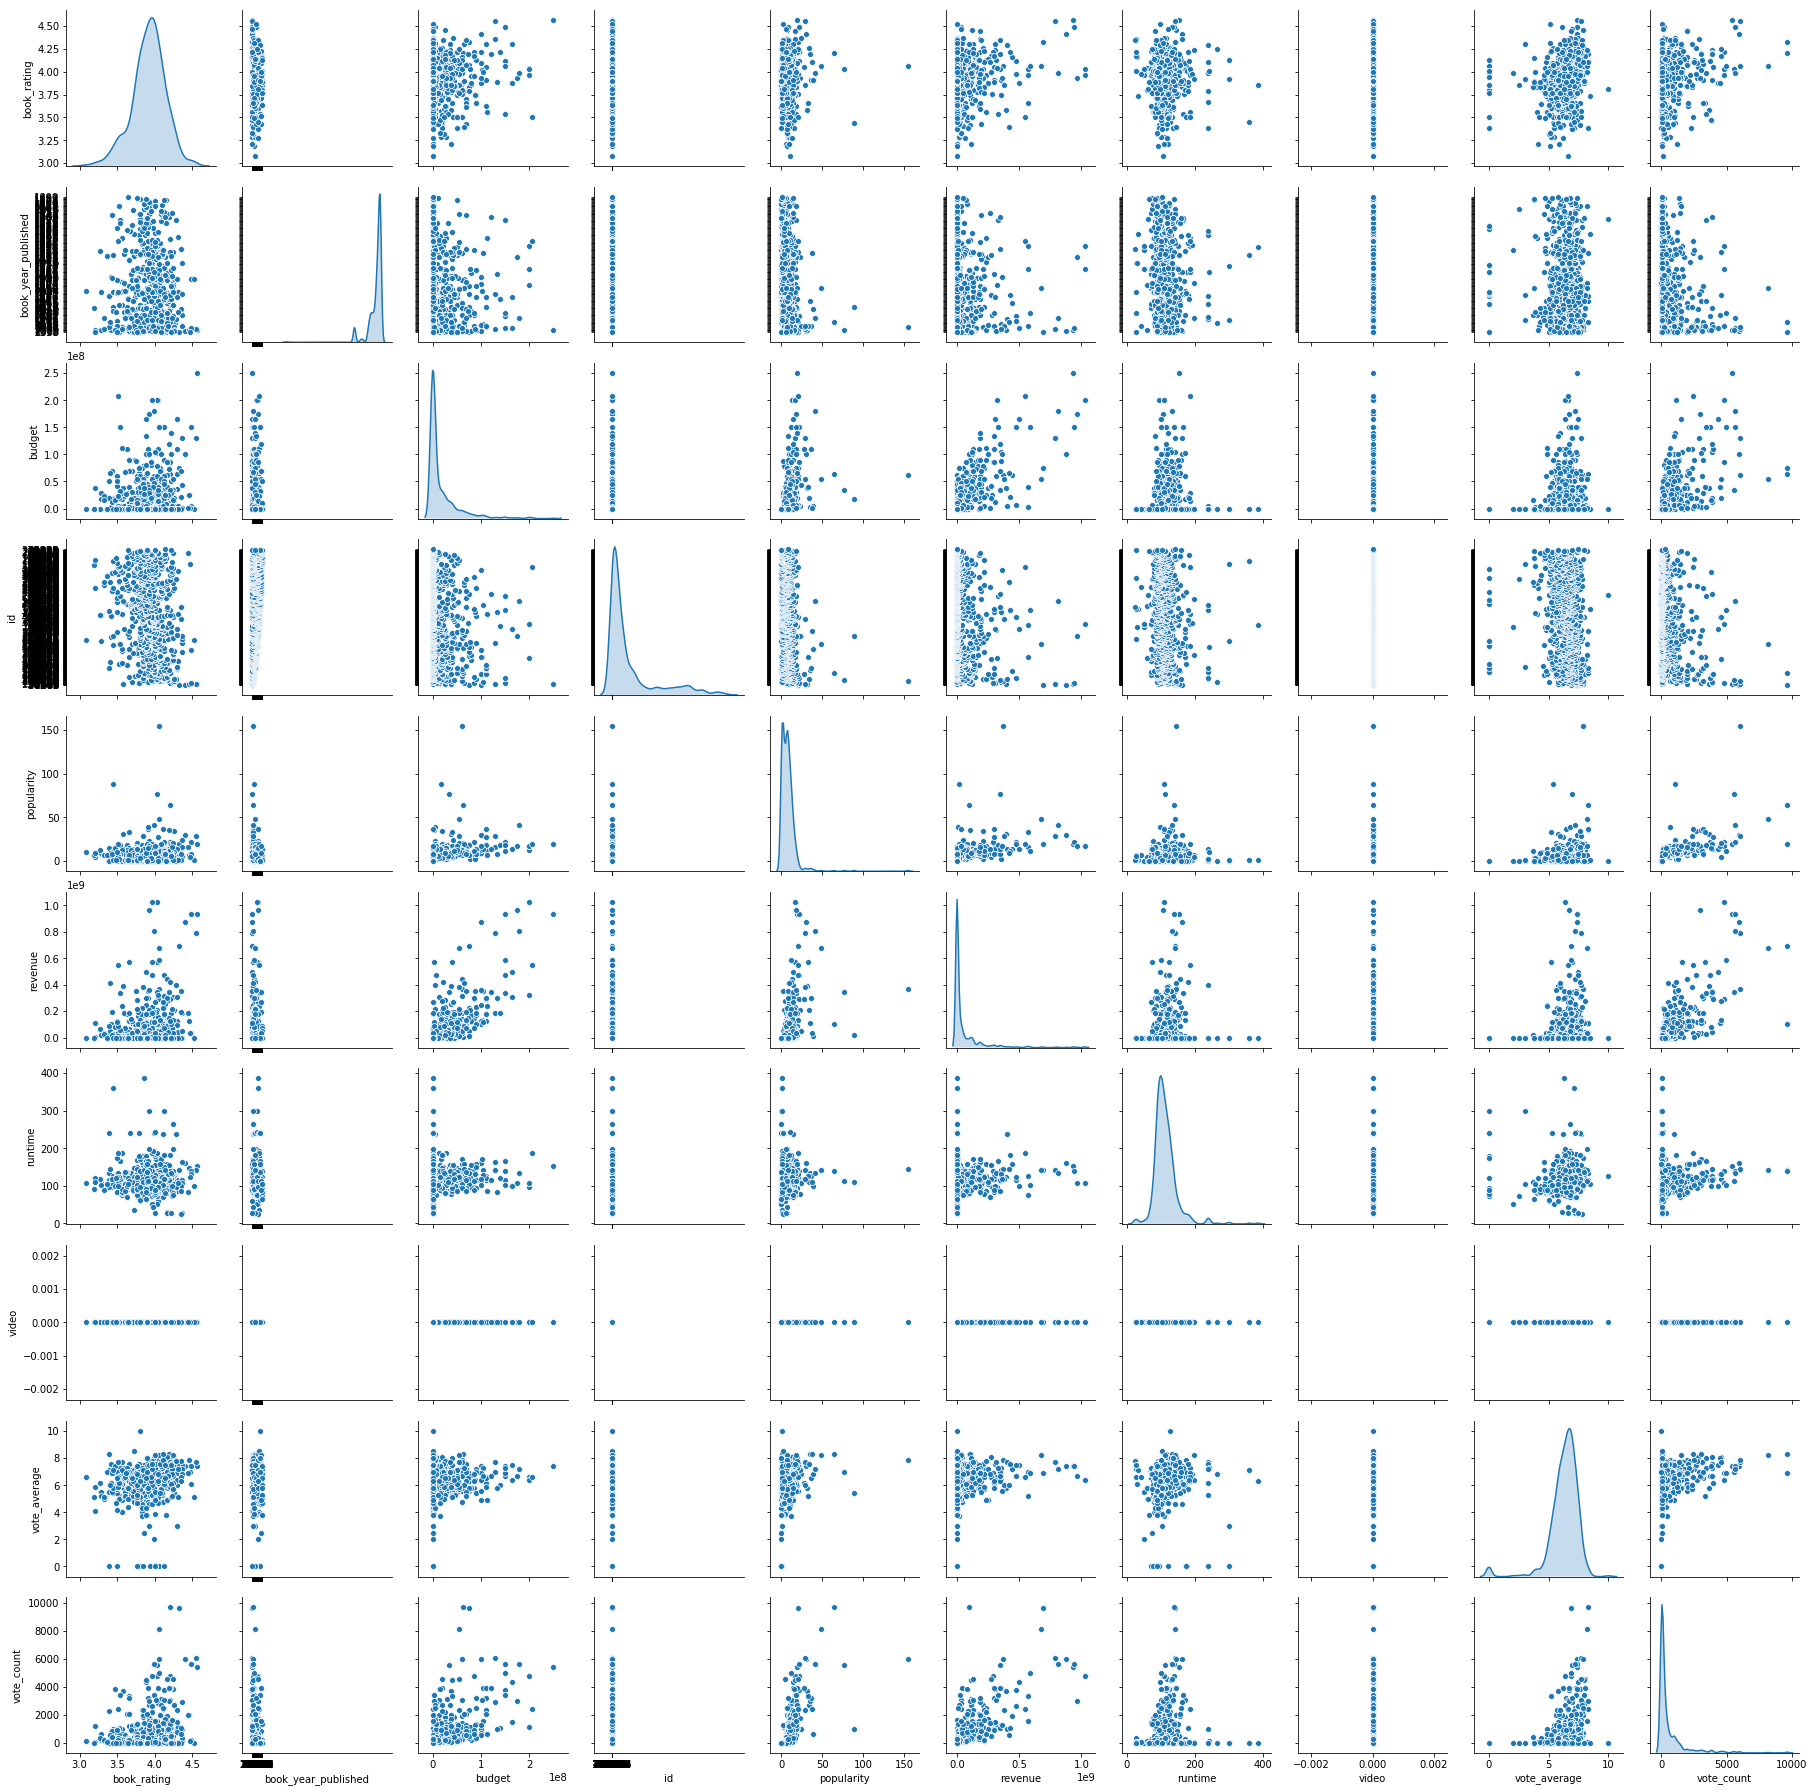

In [24]:
sns.pairplot(diag_kind = 'kde', data = book_movie)

In [17]:
book_movie.to_pickle('book_movie.pkl')

In [67]:
with open('book_movie_data.pkl', 'wb') as f:
    pickle.dump(book_movie, f)

In [29]:
book_movie.to_csv('book_movie.csv')